In [77]:
# Required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [78]:
#Reading pastry dataset
df = pd.read_csv('../datasets/coffee_shop/pastry.csv')

In [79]:
# Drops null values
df.dropna(inplace = True)

In [80]:
# Replaces column to remove special character
df = df.rename(columns={'% waste': 'pct_waste'})

In [81]:
# Converts percentage strings to equivalent numbers
df["pct_waste"] = df["pct_waste"].replace({'%':''}, regex=True).astype(int) / 100

In [82]:
# Adds a new column with the equivalent day of week of each date
# MONDAY: 0 - SUNDAY 6
df["transaction_weekday"] = pd.to_datetime(df['transaction_date'], format = '%m/%d/%Y').dt.dayofweek

In [83]:
df.head()

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,pct_waste,transaction_weekday
0,3,4/1/2019,69,18,8,10,0.56,0
1,3,4/1/2019,70,18,12,6,0.33,0
2,3,4/1/2019,71,18,8,10,0.56,0
3,3,4/1/2019,72,48,9,39,0.81,0
4,3,4/1/2019,73,18,9,9,0.50,0


In [84]:
df.describe()

,sales_outlet_id,product_id,start_of_day,quantity_sold,waste,pct_waste,transaction_weekday
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,5.394137,70.983713,24.058632,9.296417,14.657980,0.581075,2.993485
std,2.049477,1.417582,12.063414,5.440115,11.202108,0.208594,2.022736
min,3.000000,69.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,70.000000,18.000000,6.000000,8.000000,0.440000,1.000000
50%,5.000000,71.000000,18.000000,8.000000,11.000000,0.580000,3.000000
75%,8.000000,72.000000,18.000000,11.000000,15.000000,0.720000,5.000000
max,8.000000,73.000000,48.000000,32.000000,47.000000,0.960000,6.000000


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 0 to 306
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sales_outlet_id      307 non-null    int64  
 1   transaction_date     307 non-null    object 
 2   product_id           307 non-null    int64  
 3   start_of_day         307 non-null    int64  
 4   quantity_sold        307 non-null    int64  
 5   waste                307 non-null    int64  
 6   pct_waste            307 non-null    float64
 7   transaction_weekday  307 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 21.6+ KB


### Data Analysis

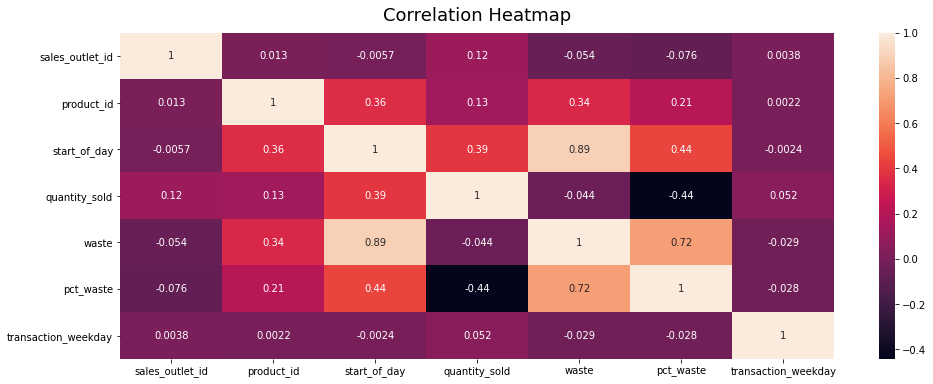

In [86]:
#  Displays the data correlation between the features.
#  Strong correlation between the start_of_day and the waste
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), annot = True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.show()

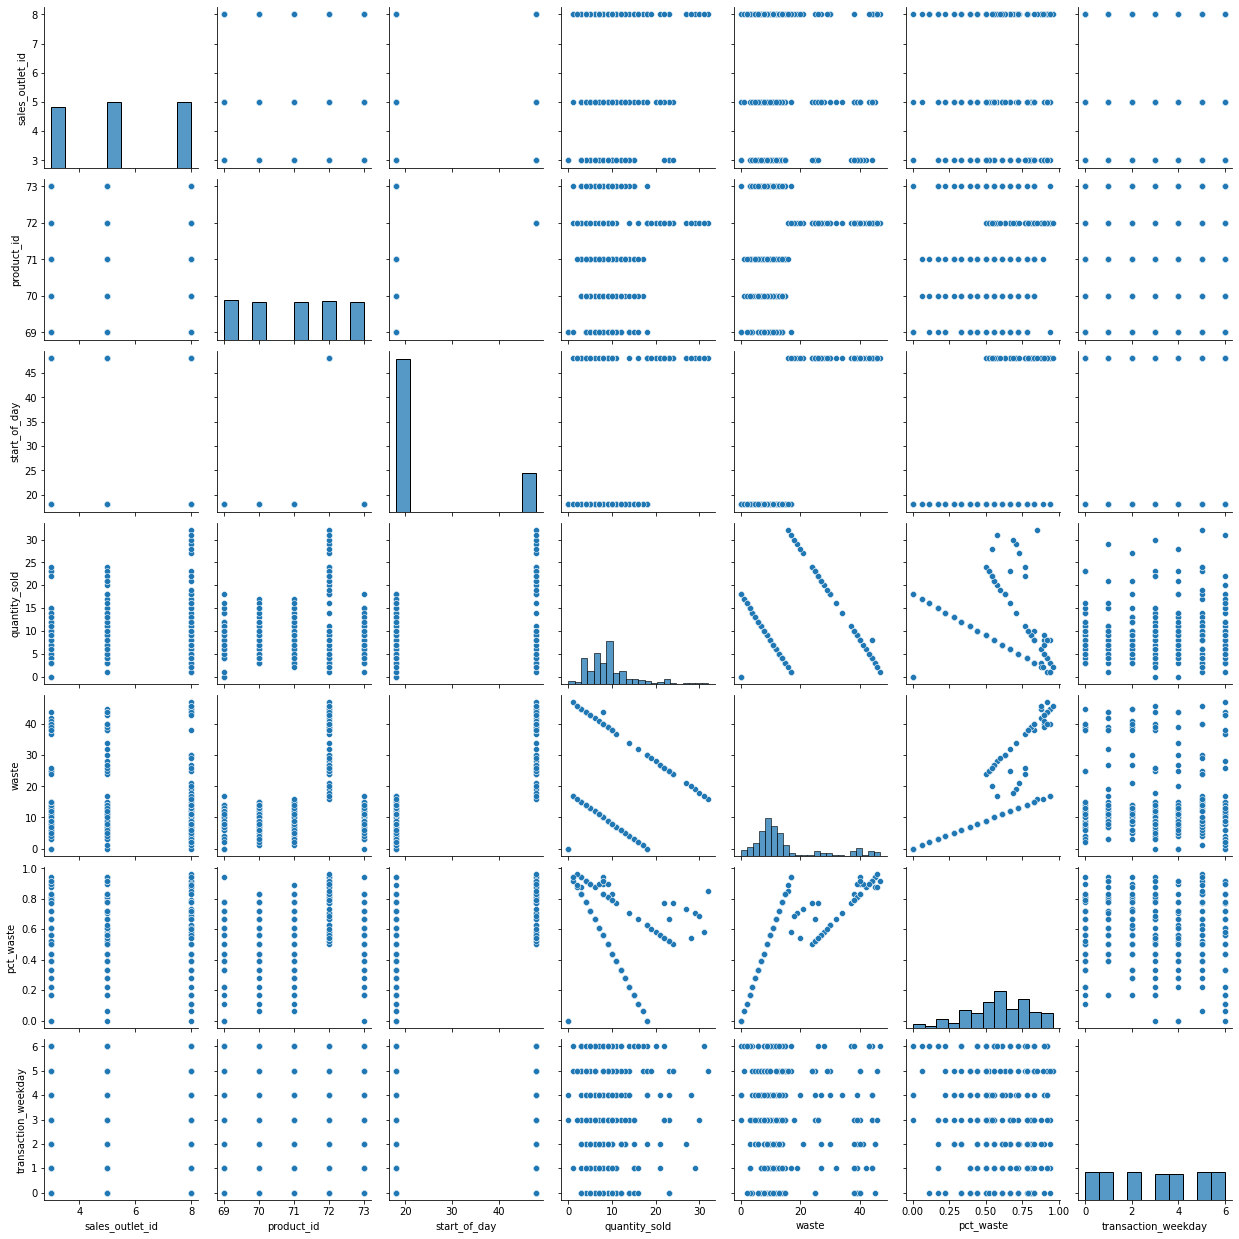

In [87]:
sns.pairplot(data=df)

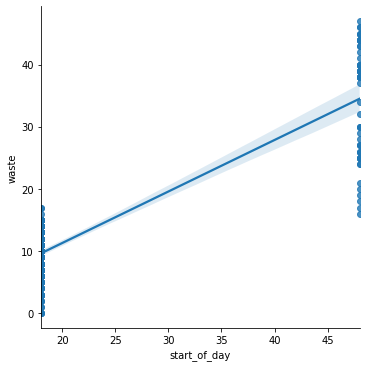

In [89]:
sns.lmplot(x='start_of_day', y ='waste', data=df)

## Define test data

In [210]:
y = df['waste']

X = df[['start_of_day', 'quantity_sold','transaction_weekday']]

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Linear Regression

In [212]:
lr = LinearRegression()

In [213]:
# Training test data
lr.fit(X_train,y_train)

LinearRegression()

In [214]:
# Coeficients for start_of_day, quantity_sol, and transaction_weekday, respectively.
coeffecients = pd.DataFrame(lr.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
start_of_day,0.998873
quantity_sold,-0.951376
transaction_weekday,-0.011600


In [207]:
# Predicting values based on trained data.
predictions = lr.predict(X_test)

Text(0, 0.5, 'Predicted Data')

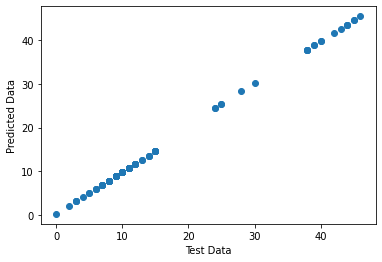

In [208]:
plt.scatter(y_test, predictions)
plt.xlabel('Test Data')
plt.ylabel('Predicted Data')

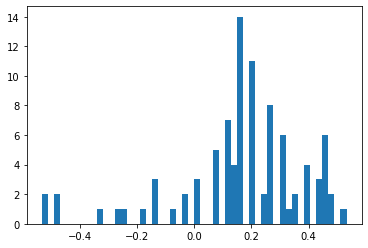

In [209]:
#Checking distribution of residuals.
plt.hist((y_test-predictions),bins=50);